In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')


In [2]:
iris_data=pd.read_csv("Iris.csv")

In [3]:
features=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]

In [4]:
iris_data=iris_data.dropna(subset=features)

In [5]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_data = iris_data.sample(frac=1)  ## Randomize the dataset 


In [7]:
## Train and Test/validate split


In [8]:
train_size=150
train_data=iris_data[0:train_size][features]
test_data=iris_data[train_size:][features]

In [9]:
##Scale all data between 0 to 10 without changing thier statestical significance as the value of all the column have different ranges

In [10]:
train_data=(train_data-train_data.min())/(train_data.max()-train_data.min())
test_data=(test_data-test_data.min())/(test_data.max()-test_data.min())

In [11]:
# we need 3 centroids so select one as minimum , max, and median 
def get_initial_centroids(data):
    c1=data.apply(lambda x: (x.max()),axis=0)    ## Axis =0 means it will take data from each column 
    c2=data.apply(lambda x: (x.min()),axis=0)    ## Axis =0 means it will take data from each column 
    c3=data.apply(lambda x: (x.median()),axis=0) ## Axis =0 means it will take data from each column 
    centroid=pd.concat([c1,c2,c3],axis=1)        ## Intial centroids
    return centroid

In [12]:
#return squered sum distance of each points in a dataset from a given centroid.
def SSE(data,centroids):
    return ((data-centroids)**2).sum(axis=1)

In [13]:
## Returns Mean of a given column. Used in calculating centroids by using mean of all points
def updateByMean(column):
    return column.sum()/column.count()
    

In [14]:
## Returns Median of a given column. Used in calculating centroids by using median of all points

def updateByMediods(column):
    return column.median()

In [15]:
def calculatemedioids(groupdata):
    total_distance=10**10
    for i in groupdata.index:
        dist_i=0
        for j in groupdata.index:
            dist_i+=((groupdata.loc[i]-groupdata.loc[j])**2).sum()
            
        if dist_i<total_distance:
            centroid=groupdata.loc[i]
            total_distance=dist_i
    return centroid
        

In [16]:
# Assign a cluster to each points (0,1,2)
def get_labels(data,centroids):
    
    distance=centroids.apply(lambda x: SSE(data,x)) # calculate distance or SSE  for each points from each centroids 
    
    
    return distance.idxmin(axis=1) # return the cluster with minimum SSE for each points

In [17]:
def update_centroids(data,labels,type):    
    """
     type could be "Mean" or "Median" 
     By "Mean" function will calculate centroids by mean of all the points
     By "Median" function will calculate centroids by medain of all the points
    """

    #Did groupby labels to group all the data points in each cluster and the calculate mean or median of the points within the cluster

    if type=="Mean":
        return data.groupby(labels).apply(lambda x: updateByMean(x) ).T  #Transposed to get the same structure of centroids as  initial
    elif type=="Median":
        # return data.groupby(labels).apply(lambda x: updateByMediods(x) ).T  
        return data.groupby(labels).apply(lambda x:calculatemedioids(x)).T
    

In [18]:
def plot_clusters(data,labels):

    """
    Total 4 plots for the given data and their labels.
    1:- SepalLengthCm vs PetalLengthCm
    2:- SepalLengthCm vs PetalWidthCm
    3:- SepalWidthCm vs PetalLengthCm
    4:- SepalWidthCm vs PetalWidthCm
    """

    fig=plt.figure()
    
    
    plot1=fig.add_subplot(221)
    plot2=fig.add_subplot(222)
    plot3=fig.add_subplot(223)
    plot4=fig.add_subplot(224)
    
    
    plot1.scatter(data["SepalLengthCm"] ,data["PetalLengthCm"] , c=labels)
    
    # plot1.set_title("SepalLengthCm vs PetalLengthCm")
    plot1.set_xlabel("SepalLengthCm")
    plot1.set_ylabel("PetalLengthCm")
    
    plot2.scatter(data["SepalLengthCm"] ,data["PetalWidthCm"] , c=labels)
    
    # plot2.set_title("SepalLengthCm vs PetalWidthCm")
    plot2.set_xlabel("SepalLengthCm")
    plot2.set_ylabel("PetalWidthCm")
    
    plot3.scatter(data["SepalWidthCm"] ,data["PetalLengthCm"] , c=labels)
    
    # plot3.set_title("SepalWidthCm vs PetalLengthCm")
    plot3.set_xlabel("SepalWidthCm")
    plot3.set_ylabel("PetalLengthCm")
    
    plot4.scatter(data["SepalWidthCm"] ,data["PetalWidthCm"] , c=labels)
    
    # plot4.set_title("SepalWidthCm vs PetalWidthCm")
    plot4.set_xlabel("SepalWidthCm")
    plot4.set_ylabel("PetalWidthCm")
    fig.tight_layout()
    
    fig.show()



In [19]:
"""
Function takes an array of index that belongs to a particular cluster and check the labels of each index from main dataframe provided to us
Print count of each labels in the given cluster 
Used to undestand how the clustering has performed 
"""
def label_for_each_group(index): 
    count_Iris_setosa=0
    count_Iris_virginica=0
    count_Iris_versicolor=0
    for i in index:
        if iris_data.loc[i]["Species"]=='Iris-versicolor':
            count_Iris_versicolor+=1
        elif iris_data.loc[i]["Species"]=='Iris-virginica':
            count_Iris_virginica+=1
        else :
            count_Iris_setosa+=1

    print("Count of each labels in given cluster:-")
    print("Iris-versicolor:-",count_Iris_versicolor)
    print("Iris-virginica:-",count_Iris_virginica)
    print("Iris-setosa:-",count_Iris_setosa)

   
   
            

In [20]:
### Training K means

In [21]:
def Clustering(initial_centroids,Type):
    """
     Type could be "Mean" or "Median" 
     By "Mean" function will calculate K-means
     By "Median" function will calculate K-Mediods
    """
    
    delta=10**-7  ## centroid different must be less than or equal to this
    current_centroid=initial_centroids
    centroid_deff=10*4
    iteration=1

    while centroid_deff>delta:
        print("interation is :- ",iteration)
        #assign each point to centroids
        labels=get_labels(train_data,current_centroid)
        
        SSE_error = current_centroid.apply(lambda x : SSE(train_data,x)).min(axis=1).sum()

        """
        SSE function will return SSE for each points from each centroids. 
        By using Min we take the SSE from nearest cluster(with lowest SSE) of each points and add them up
        By this we are calclulating sum of intercluster SSE
        """
        
        print("SSE is :-" ,SSE_error)  
        

    
        #Update centroids
        new_centroids=update_centroids(train_data,labels,Type)
        
        #centroids diff
        centroid_deff=abs((current_centroid-new_centroids)).sum().sum()
    
        print("centroid diff:- " ,centroid_deff)
    
        iteration+=1
    
    
        plot_clusters(train_data,labels)
        current_centroid=new_centroids
    return current_centroid



    

In [22]:
## Assigning each clusters(0,1,2) to approrpiate labels

interation is :-  1
SSE is :- 32.96894700197899
centroid diff:-  1.702282427409131
interation is :-  2
SSE is :- 9.442510388534416
centroid diff:-  0.6008211311580791
interation is :-  3
SSE is :- 7.240162537959597
centroid diff:-  0.12323638840453005
interation is :-  4
SSE is :- 7.073931926882713
centroid diff:-  0.09720285898508241
interation is :-  5
SSE is :- 7.003317600098681
centroid diff:-  0.023376982785923428
interation is :-  6
SSE is :- 6.998114004826762
centroid diff:-  0.0


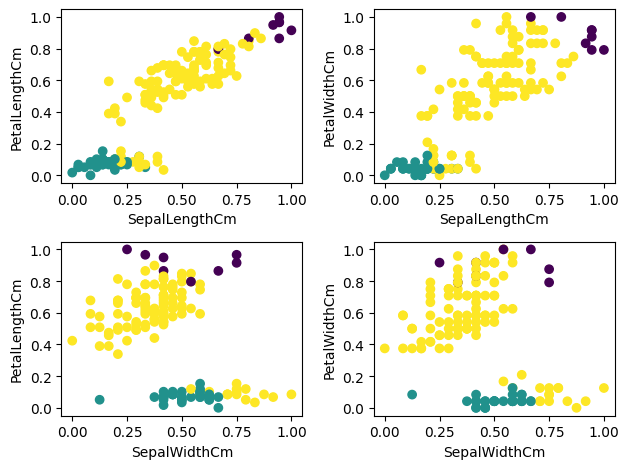

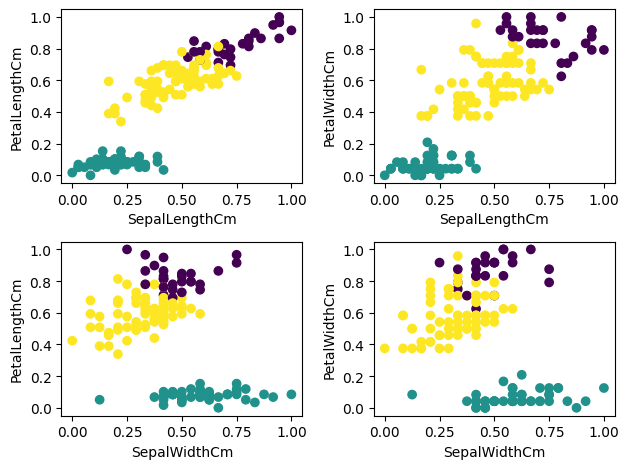

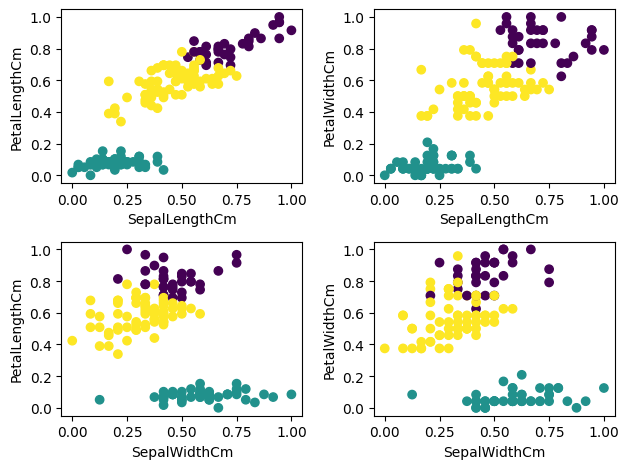

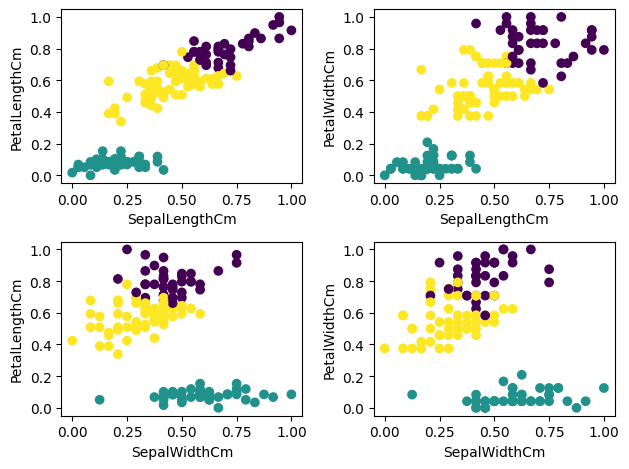

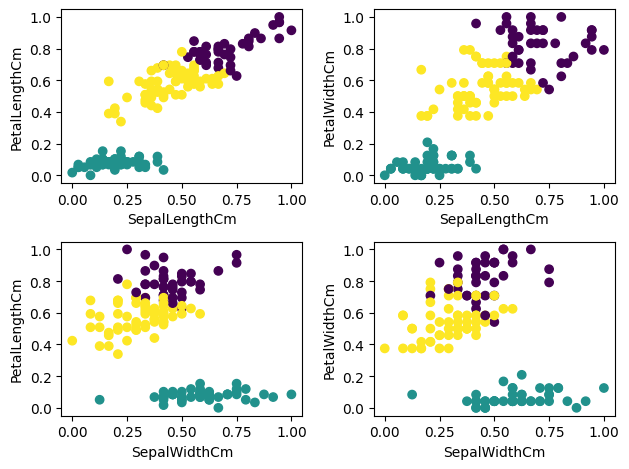

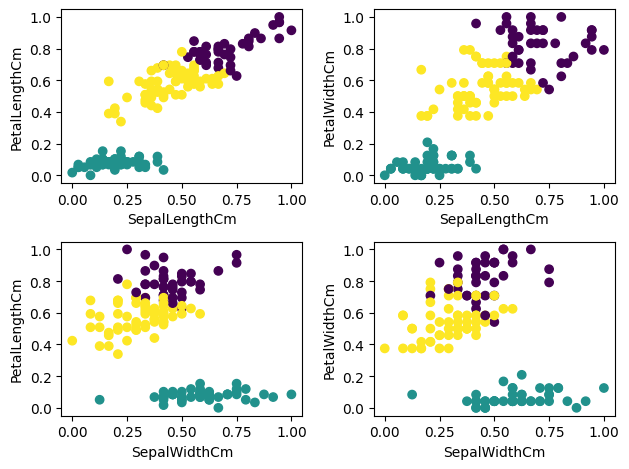

In [23]:
final_centroids=Clustering(get_initial_centroids(train_data),"Mean")

In [24]:
train_lables=get_labels(train_data,final_centroids)

In [25]:
label_for_each_group(train_data.groupby(train_lables).apply(lambda x:x.index)[0])

Count of each labels in given cluster:-
Iris-versicolor:- 3
Iris-virginica:- 36
Iris-setosa:- 0


In [26]:
label_for_each_group(train_data.groupby(train_lables).apply(lambda x:x.index)[1])

Count of each labels in given cluster:-
Iris-versicolor:- 0
Iris-virginica:- 0
Iris-setosa:- 50


In [27]:
label_for_each_group(train_data.groupby(train_lables).apply(lambda x:x.index)[2])

Count of each labels in given cluster:-
Iris-versicolor:- 47
Iris-virginica:- 14
Iris-setosa:- 0
